In [1]:
import numpy as np
import os
import cv2
import random
import math

import matplotlib.pyplot as plt
from PIL import Image

import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms

char_to_index = {"深":0, "秦":1, "京":2, "海":3, "成":4, "南":5, "杭":6, "苏":7, "松":8}
index_to_char = {0:"深", 1:"秦", 2:"京", 3:"海", 4:"成", 5:"南", 6:"杭", 7:"苏", 8:"松"}

from preprocess import *

label_file = "./data/train-data-label.txt"
image_file = "./data/train-data"
data_list = []
with open(label_file, 'r') as file_to_read:
    while True:
        lines = file_to_read.readline().strip() # 整行读取数据
        if not lines:
            break
        lines = lines.split(",  ")
        image_path = os.path.join(image_file, lines[1])
        label = [];
        label.append(char_to_index[lines[0][0]])
        for i in range(1, len(lines[0])):
            if '0' <= lines[0][i] and lines[0][i] <= '9':
                label.append(9 + ord(lines[0][i]) - ord('0'))
            else:
                label.append(9 + 10 + ord(lines[0][i]) - ord('A'))
        data_list.append({"image_path": image_path, "label":label})

In [2]:
data_index = 49#3001
img_path = data_list[data_index]["image_path"]
print(data_list[data_index]["image_path"])
pts1, pts2, char_segmentation = preprocess(img_path)
print(pts1, pts2)
print(char_segmentation)

./data/train-data/2b6b3180b74c55b0.jpg


/home/lbyg/Kaggle/HUAWEI2019/2019_first_SDK/HUAWEI2019-final-contest/preprocess.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
  diff_sum += (val_x[i] - val_y[i]) * (val_x[i] - val_y[i])


[[  7.   4.]
 [  4.  62.]
 [290.  62.]] [[  0.   0.]
 [  0.  69.]
 [295.  69.]]
[[0, 29], [29, 59], [68, 98], [98, 128], [128, 158], [158, 188], [188, 218], [218, 248], [248, 278]]


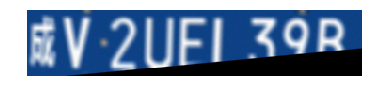

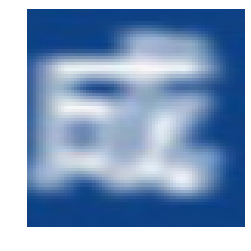

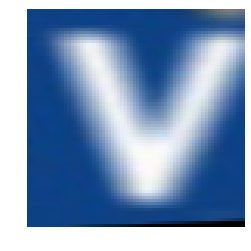

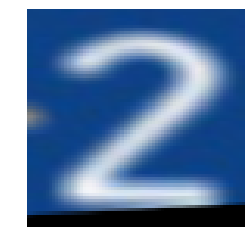

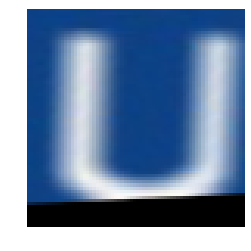

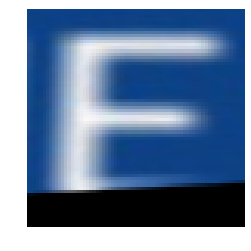

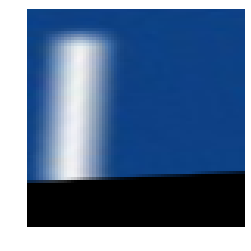

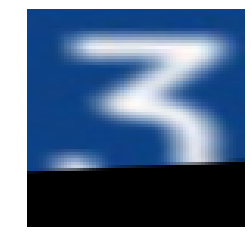

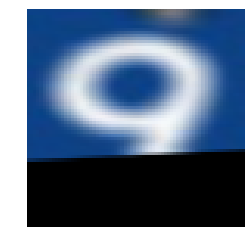

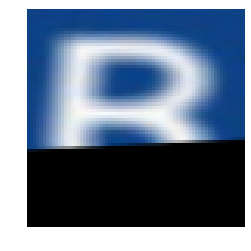

In [3]:
img = Image.open(img_path)
img = np.array(img)
h, w, _ = img.shape

M = cv2.getAffineTransform(pts1, pts2)
img_dst = cv2.warpAffine(img, M, (w, h))

plt.figure("love")
plt.imshow(img_dst, cmap='gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

for [x, y] in char_segmentation:
    char_img = cv2.resize(img_dst[:, x:y, :], (h, h), interpolation=cv2.INTER_CUBIC)
    plt.figure("love")
    plt.imshow(char_img, cmap='gray') # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.show()

In [6]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.feature = torch.nn.Sequential(
            torch.nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(2, 2)),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
            torch.nn.Conv2d(64, 192, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1)),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
            torch.nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            torch.nn.ReLU(),
            torch.nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            torch.nn.ReLU(),
            torch.nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        )
        self.classify = nn.Sequential(
                nn.BatchNorm1d(256),
                nn.Dropout(0.5),
                nn.Linear(256, 45),
            )

    def forward(self, x):
        x = self.feature(x)
        adaptiveAvgPoolWidth = x.shape[2]
        x = F.avg_pool2d(x, kernel_size=adaptiveAvgPoolWidth)
        x = x.view(x.size(0), -1)
        x = self.classify(x)
        return x

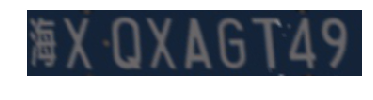

pred.shape =  torch.Size([9, 45])
0 5
南 海
1 42
X X
2 39
U Q
3 42
X X
4 19
A A
5 25
G G
6 38
T T
7 13
4 4
8 18
9 9


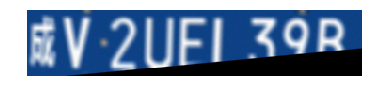

pred.shape =  torch.Size([9, 45])
0 4
成 成
1 40
V V
2 11
2 2
3 39
U U
4 24
F E
5 30
L L
6 42
X 3
7 18
9 9
8 34
P B


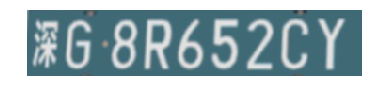

pred.shape =  torch.Size([9, 45])
0 5
南 深
1 25
G G
2 17
8 8
3 36
R R
4 15
6 6
5 14
5 5
6 11
2 2
7 21
C C
8 43
Y Y


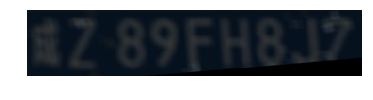

pred.shape =  torch.Size([9, 45])
0 5
南 成
1 44
Z Z
2 43
Y 8
3 18
9 9
4 24
F F
5 41
W H
6 17
8 8
7 28
J J
8 44
Z Z


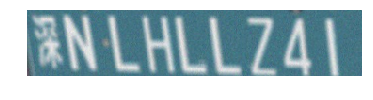

pred.shape =  torch.Size([9, 45])
0 7
苏 深
1 32
N N
2 30
L L
3 26
H H
4 30
L L
5 30
L L
6 16
7 Z
7 13
4 4
8 10
1 1


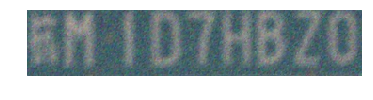

pred.shape =  torch.Size([9, 45])
0 1
秦 杭
1 31
M M
2 10
1 1
3 11
2 D
4 10
1 7
5 26
H H
6 14
5 B
7 44
Z Z
8 35
Q 0


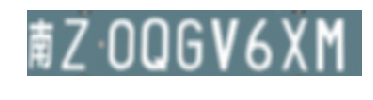

pred.shape =  torch.Size([9, 45])
0 1
秦 南
1 44
Z Z
2 9
0 0
3 35
Q Q
4 25
G G
5 40
V V
6 15
6 6
7 42
X X
8 31
M M


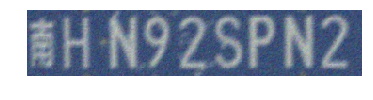

pred.shape =  torch.Size([9, 45])
0 5
南 南
1 26
H H
2 32
N N
3 18
9 9
4 11
2 2
5 37
S S
6 34
P P
7 32
N N
8 11
2 2


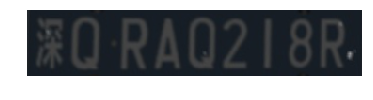

pred.shape =  torch.Size([9, 45])
0 5
南 深
1 35
Q Q
2 36
R R
3 13
4 A
4 9
0 Q
5 11
2 2
6 10
1 1
7 17
8 8
8 36
R R


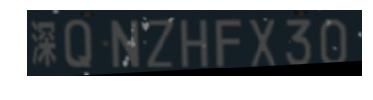

pred.shape =  torch.Size([9, 45])
0 4
成 深
1 35
Q Q
2 25
G N
3 11
2 Z
4 26
H H
5 24
F F
6 42
X X
7 12
3 3
8 38
T 0


In [20]:
def pred_to_char(pred):
    if pred < 9:
        return index_to_char[pred]
    elif pred < 9 + 10:
        return str(pred - 9)
    else:
        pred -= 19
        return chr(ord('A') + pred)

model_file = "./model"
img_w, img_h = 64, 64
class_n = 45
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = Net()
best_model_filename = model_file + os.sep + "best_checkpoint.pth.tar"
best_model = torch.load(best_model_filename)
model_ft.load_state_dict(best_model["state_dict"])
model_ft.to(device)

for data_index in range(3000, 3010):
    img_path = data_list[data_index]["image_path"]
    pts1, pts2, char_segmentation = preprocess(img_path)
    
    img = Image.open(img_path)
    img = np.array(img)
    h, w, _ = img.shape

    M = cv2.getAffineTransform(pts1, pts2)
    img_dst = cv2.warpAffine(img, M, (w, h))

    plt.figure("love")
    plt.imshow(img_dst, cmap='gray') # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.show()
    
    char_img_tensor_list = []
    for [x, y] in char_segmentation:
        char_img = cv2.resize(img_dst[:, x:y, :], (img_w, img_h), interpolation=cv2.INTER_CUBIC)

        char_img_tensor = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])(char_img)
        char_img_tensor = char_img_tensor.to(device)
        char_img_tensor_list.append(char_img_tensor)
    char_img_tensor = torch.stack(char_img_tensor_list, 0)
    pred = model_ft(char_img_tensor)
    for i in range(pred.shape[0]):
        if i == 0:
            _, res = torch.max(pred[i,:9], 0)
            res = res.item()
        elif i == 1:
            _, res = torch.max(pred[i,19:], 0)
            res = res.item() + 19
        else:
            _, res = torch.max(pred[i,9:], 0)
            res = res.item() + 9
        print(i, res)
        print(pred_to_char(res), pred_to_char(data_list[data_index]["label"][i]))

In [35]:
import pickle

data = [1, 2]
output = open('data.pkl', 'wb')

pickle.dump(data, output)

output.close()

In [36]:
pkl_file = open('data.pkl', 'rb')

data1 = pickle.load(pkl_file)
print("data1 = ", data1)

data1 =  [1, 2]


In [4]:
s = "a.jpg"
s = s.replace("jpg", "pkl")
print(s)

a.pkl


In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        inplace = True
        self.conv1_7x7_s2 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        self.conv1_7x7_s2_bn = nn.BatchNorm2d(64, affine=True)
        self.conv1_relu_7x7 = nn.ReLU (inplace)
        self.pool1_3x3_s2 = nn.MaxPool2d ((3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=True)
        self.conv2_3x3_reduce = nn.Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        self.conv2_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.conv2_relu_3x3_reduce = nn.ReLU (inplace)
        self.conv2_3x3 = nn.Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv2_3x3_bn = nn.BatchNorm2d(192, affine=True)
        self.conv2_relu_3x3 = nn.ReLU (inplace)
        self.pool2_3x3_s2 = nn.MaxPool2d ((3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=True)
        self.inception_3a_1x1 = nn.Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_1x1_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3a_relu_1x1 = nn.ReLU (inplace)
        self.inception_3a_3x3_reduce = nn.Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3a_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_3a_3x3 = nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3a_3x3_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3a_relu_3x3 = nn.ReLU (inplace)
        self.inception_3a_double_3x3_reduce = nn.Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_double_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3a_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_3a_double_3x3_1 = nn.Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3a_double_3x3_1_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3a_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_3a_double_3x3_2 = nn.Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3a_double_3x3_2_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3a_relu_double_3x3_2 = nn.ReLU (inplace)
        self.inception_3a_pool = nn.AvgPool2d (3, stride=1, padding=1, ceil_mode=True, count_include_pad=True)
        self.inception_3a_pool_proj = nn.Conv2d(192, 32, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3a_pool_proj_bn = nn.BatchNorm2d(32, affine=True)
        self.inception_3a_relu_pool_proj = nn.ReLU (inplace)
        self.inception_3b_1x1 = nn.Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_1x1_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3b_relu_1x1 = nn.ReLU (inplace)
        self.inception_3b_3x3_reduce = nn.Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3b_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_3b_3x3 = nn.Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3b_3x3_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3b_relu_3x3 = nn.ReLU (inplace)
        self.inception_3b_double_3x3_reduce = nn.Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_double_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3b_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_3b_double_3x3_1 = nn.Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3b_double_3x3_1_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3b_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_3b_double_3x3_2 = nn.Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3b_double_3x3_2_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3b_relu_double_3x3_2 = nn.ReLU (inplace)
        self.inception_3b_pool = nn.AvgPool2d (3, stride=1, padding=1, ceil_mode=True, count_include_pad=True)
        self.inception_3b_pool_proj = nn.Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3b_pool_proj_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3b_relu_pool_proj = nn.ReLU (inplace)
        self.inception_3c_3x3_reduce = nn.Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3c_3x3_reduce_bn = nn.BatchNorm2d(128, affine=True)
        self.inception_3c_relu_3x3_reduce = nn.ReLU (inplace)
        self.inception_3c_3x3 = nn.Conv2d(128, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.inception_3c_3x3_bn = nn.BatchNorm2d(160, affine=True)
        self.inception_3c_relu_3x3 = nn.ReLU (inplace)
        self.inception_3c_double_3x3_reduce = nn.Conv2d(320, 64, kernel_size=(1, 1), stride=(1, 1))
        self.inception_3c_double_3x3_reduce_bn = nn.BatchNorm2d(64, affine=True)
        self.inception_3c_relu_double_3x3_reduce = nn.ReLU (inplace)
        self.inception_3c_double_3x3_1 = nn.Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.inception_3c_double_3x3_1_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3c_relu_double_3x3_1 = nn.ReLU (inplace)
        self.inception_3c_double_3x3_2 = nn.Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.inception_3c_double_3x3_2_bn = nn.BatchNorm2d(96, affine=True)
        self.inception_3c_relu_double_3x3_2 = nn.ReLU (inplace)
        self.inception_3c_pool = nn.MaxPool2d ((3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=True)
        
        self.classify = nn.Sequential(
                nn.BatchNorm1d(576),
                nn.Dropout(0.5),
                nn.Linear(576, 45),
            )

    def features(self, input):
        conv1_7x7_s2_out = self.conv1_7x7_s2(input)
        conv1_7x7_s2_bn_out = self.conv1_7x7_s2_bn(conv1_7x7_s2_out)
        conv1_relu_7x7_out = self.conv1_relu_7x7(conv1_7x7_s2_bn_out)
        pool1_3x3_s2_out = self.pool1_3x3_s2(conv1_relu_7x7_out)
        conv2_3x3_reduce_out = self.conv2_3x3_reduce(pool1_3x3_s2_out)
        conv2_3x3_reduce_bn_out = self.conv2_3x3_reduce_bn(conv2_3x3_reduce_out)
        conv2_relu_3x3_reduce_out = self.conv2_relu_3x3_reduce(conv2_3x3_reduce_bn_out)
        conv2_3x3_out = self.conv2_3x3(conv2_relu_3x3_reduce_out)
        conv2_3x3_bn_out = self.conv2_3x3_bn(conv2_3x3_out)
        conv2_relu_3x3_out = self.conv2_relu_3x3(conv2_3x3_bn_out)
        pool2_3x3_s2_out = self.pool2_3x3_s2(conv2_relu_3x3_out)
        inception_3a_1x1_out = self.inception_3a_1x1(pool2_3x3_s2_out)
        inception_3a_1x1_bn_out = self.inception_3a_1x1_bn(inception_3a_1x1_out)
        inception_3a_relu_1x1_out = self.inception_3a_relu_1x1(inception_3a_1x1_bn_out)
        inception_3a_3x3_reduce_out = self.inception_3a_3x3_reduce(pool2_3x3_s2_out)
        inception_3a_3x3_reduce_bn_out = self.inception_3a_3x3_reduce_bn(inception_3a_3x3_reduce_out)
        inception_3a_relu_3x3_reduce_out = self.inception_3a_relu_3x3_reduce(inception_3a_3x3_reduce_bn_out)
        inception_3a_3x3_out = self.inception_3a_3x3(inception_3a_relu_3x3_reduce_out)
        inception_3a_3x3_bn_out = self.inception_3a_3x3_bn(inception_3a_3x3_out)
        inception_3a_relu_3x3_out = self.inception_3a_relu_3x3(inception_3a_3x3_bn_out)
        inception_3a_double_3x3_reduce_out = self.inception_3a_double_3x3_reduce(pool2_3x3_s2_out)
        inception_3a_double_3x3_reduce_bn_out = self.inception_3a_double_3x3_reduce_bn(inception_3a_double_3x3_reduce_out)
        inception_3a_relu_double_3x3_reduce_out = self.inception_3a_relu_double_3x3_reduce(inception_3a_double_3x3_reduce_bn_out)
        inception_3a_double_3x3_1_out = self.inception_3a_double_3x3_1(inception_3a_relu_double_3x3_reduce_out)
        inception_3a_double_3x3_1_bn_out = self.inception_3a_double_3x3_1_bn(inception_3a_double_3x3_1_out)
        inception_3a_relu_double_3x3_1_out = self.inception_3a_relu_double_3x3_1(inception_3a_double_3x3_1_bn_out)
        inception_3a_double_3x3_2_out = self.inception_3a_double_3x3_2(inception_3a_relu_double_3x3_1_out)
        inception_3a_double_3x3_2_bn_out = self.inception_3a_double_3x3_2_bn(inception_3a_double_3x3_2_out)
        inception_3a_relu_double_3x3_2_out = self.inception_3a_relu_double_3x3_2(inception_3a_double_3x3_2_bn_out)
        inception_3a_pool_out = self.inception_3a_pool(pool2_3x3_s2_out)
        inception_3a_pool_proj_out = self.inception_3a_pool_proj(inception_3a_pool_out)
        inception_3a_pool_proj_bn_out = self.inception_3a_pool_proj_bn(inception_3a_pool_proj_out)
        inception_3a_relu_pool_proj_out = self.inception_3a_relu_pool_proj(inception_3a_pool_proj_bn_out)
        inception_3a_output_out = torch.cat([inception_3a_relu_1x1_out,inception_3a_relu_3x3_out,inception_3a_relu_double_3x3_2_out ,inception_3a_relu_pool_proj_out], 1)
        inception_3b_1x1_out = self.inception_3b_1x1(inception_3a_output_out)
        inception_3b_1x1_bn_out = self.inception_3b_1x1_bn(inception_3b_1x1_out)
        inception_3b_relu_1x1_out = self.inception_3b_relu_1x1(inception_3b_1x1_bn_out)
        inception_3b_3x3_reduce_out = self.inception_3b_3x3_reduce(inception_3a_output_out)
        inception_3b_3x3_reduce_bn_out = self.inception_3b_3x3_reduce_bn(inception_3b_3x3_reduce_out)
        inception_3b_relu_3x3_reduce_out = self.inception_3b_relu_3x3_reduce(inception_3b_3x3_reduce_bn_out)
        inception_3b_3x3_out = self.inception_3b_3x3(inception_3b_relu_3x3_reduce_out)
        inception_3b_3x3_bn_out = self.inception_3b_3x3_bn(inception_3b_3x3_out)
        inception_3b_relu_3x3_out = self.inception_3b_relu_3x3(inception_3b_3x3_bn_out)
        inception_3b_double_3x3_reduce_out = self.inception_3b_double_3x3_reduce(inception_3a_output_out)
        inception_3b_double_3x3_reduce_bn_out = self.inception_3b_double_3x3_reduce_bn(inception_3b_double_3x3_reduce_out)
        inception_3b_relu_double_3x3_reduce_out = self.inception_3b_relu_double_3x3_reduce(inception_3b_double_3x3_reduce_bn_out)
        inception_3b_double_3x3_1_out = self.inception_3b_double_3x3_1(inception_3b_relu_double_3x3_reduce_out)
        inception_3b_double_3x3_1_bn_out = self.inception_3b_double_3x3_1_bn(inception_3b_double_3x3_1_out)
        inception_3b_relu_double_3x3_1_out = self.inception_3b_relu_double_3x3_1(inception_3b_double_3x3_1_bn_out)
        inception_3b_double_3x3_2_out = self.inception_3b_double_3x3_2(inception_3b_relu_double_3x3_1_out)
        inception_3b_double_3x3_2_bn_out = self.inception_3b_double_3x3_2_bn(inception_3b_double_3x3_2_out)
        inception_3b_relu_double_3x3_2_out = self.inception_3b_relu_double_3x3_2(inception_3b_double_3x3_2_bn_out)
        inception_3b_pool_out = self.inception_3b_pool(inception_3a_output_out)
        inception_3b_pool_proj_out = self.inception_3b_pool_proj(inception_3b_pool_out)
        inception_3b_pool_proj_bn_out = self.inception_3b_pool_proj_bn(inception_3b_pool_proj_out)
        inception_3b_relu_pool_proj_out = self.inception_3b_relu_pool_proj(inception_3b_pool_proj_bn_out)
        inception_3b_output_out = torch.cat([inception_3b_relu_1x1_out,inception_3b_relu_3x3_out,inception_3b_relu_double_3x3_2_out,inception_3b_relu_pool_proj_out], 1)
        inception_3c_3x3_reduce_out = self.inception_3c_3x3_reduce(inception_3b_output_out)
        inception_3c_3x3_reduce_bn_out = self.inception_3c_3x3_reduce_bn(inception_3c_3x3_reduce_out)
        inception_3c_relu_3x3_reduce_out = self.inception_3c_relu_3x3_reduce(inception_3c_3x3_reduce_bn_out)
        inception_3c_3x3_out = self.inception_3c_3x3(inception_3c_relu_3x3_reduce_out)
        inception_3c_3x3_bn_out = self.inception_3c_3x3_bn(inception_3c_3x3_out)
        inception_3c_relu_3x3_out = self.inception_3c_relu_3x3(inception_3c_3x3_bn_out)
        inception_3c_double_3x3_reduce_out = self.inception_3c_double_3x3_reduce(inception_3b_output_out)
        inception_3c_double_3x3_reduce_bn_out = self.inception_3c_double_3x3_reduce_bn(inception_3c_double_3x3_reduce_out)
        inception_3c_relu_double_3x3_reduce_out = self.inception_3c_relu_double_3x3_reduce(inception_3c_double_3x3_reduce_bn_out)
        inception_3c_double_3x3_1_out = self.inception_3c_double_3x3_1(inception_3c_relu_double_3x3_reduce_out)
        inception_3c_double_3x3_1_bn_out = self.inception_3c_double_3x3_1_bn(inception_3c_double_3x3_1_out)
        inception_3c_relu_double_3x3_1_out = self.inception_3c_relu_double_3x3_1(inception_3c_double_3x3_1_bn_out)
        inception_3c_double_3x3_2_out = self.inception_3c_double_3x3_2(inception_3c_relu_double_3x3_1_out)
        inception_3c_double_3x3_2_bn_out = self.inception_3c_double_3x3_2_bn(inception_3c_double_3x3_2_out)
        inception_3c_relu_double_3x3_2_out = self.inception_3c_relu_double_3x3_2(inception_3c_double_3x3_2_bn_out)
        inception_3c_pool_out = self.inception_3c_pool(inception_3b_output_out)
        inception_3c_output_out = torch.cat([inception_3c_relu_3x3_out,inception_3c_relu_double_3x3_2_out,inception_3c_pool_out], 1)
        
        return inception_3c_output_out
        
    def forward(self, x):
        x = self.features(x)
        print(x.shape)
        adaptiveAvgPoolWidth = x.shape[2]
        x = F.avg_pool2d(x, kernel_size=adaptiveAvgPoolWidth)
        x = x.view(x.size(0), -1)
        x = self.classify(x)
        return x

In [13]:
from torchvision import models
from pretrainedmodels.models import bninception
use_pretrained = True

alexnet_model = bninception(pretrained="imagenet")
alexnet_dict = alexnet_model.state_dict().copy()

model = Net()
model_dict = model.state_dict().copy()

alexnet_list = list (alexnet_model.state_dict().keys() )
model_list = list(model.state_dict().keys() )
#print("alexnet_list = ", alexnet_list)
#print("model_list = ", model_list)
for i in range(len(model_list)):
    if model_list[i] in alexnet_dict:
        print(model_list[i])
        model_dict[model_list[i]] = alexnet_dict[alexnet_list[i]]
model.load_state_dict(model_dict)
test_tensor = torch.Tensor(np.zeros((3, 3, 64, 64)))
pred = model(test_tensor)
print(pred)
#for name, param in model.named_parameters():
#    print(name)
#    if name[:8] == "features":
#        param.requires_grad = False

torch.Size([3, 576, 4, 4])
tensor([[-0.9780, -0.0179,  0.0820, -0.1799,  0.5109, -0.3215,  0.6691,  0.1935,
         -1.0413,  0.1375,  0.0885, -0.4561, -0.4305,  0.3885, -0.6724,  0.5212,
         -0.3271,  0.8876,  0.1732,  0.5009,  0.4666,  0.5761, -0.0766, -0.4579,
          0.1206,  0.5243,  0.2577,  0.2047, -0.1225, -0.7846, -0.0967,  0.1303,
          0.6190,  0.7547,  0.1589, -0.2315, -0.7230, -0.5014,  0.3419, -0.1644,
         -0.5421, -0.0811, -0.2871, -0.5676,  0.0036],
        [ 0.0407, -0.1218, -0.2690,  0.3984, -0.0876,  0.5730, -0.3682, -0.0597,
          0.6503, -0.0606,  0.4582,  0.4641, -0.0485, -0.1344,  0.2177, -0.5143,
         -0.4374, -1.0610, -0.1399,  0.0018, -0.5592,  0.1174,  0.6830,  0.5171,
          0.3217,  0.2189, -0.2707, -0.0588, -0.2085, -0.7111, -0.1793,  0.4428,
         -0.6396, -0.3006, -0.4916,  0.3627, -0.2257,  0.6011, -0.0893, -0.0695,
         -0.1180,  0.3390,  0.7999,  0.2698, -0.8109],
        [ 0.0913,  0.3132,  0.3813, -0.1908, -0.5758,